## 한국 (South Korea) 데이터 분석

*표본이 적어 분석의 신뢰성이 부족함

In [37]:
import pandas as pd

csv_2019 = pd.read_csv("datasets/2019.csv", sep=",")
df_2019 = pd.DataFrame(csv_2019)
print(f"2019: {df_2019.columns.tolist()}\n")
# df_2019.head()

csv_2018 = pd.read_csv("datasets/2018.csv", sep=",")
df_2018 = pd.DataFrame(csv_2018)
print(f"2018: {df_2018.columns.tolist()}\n")
# df_2018.head()

csv_2017 = pd.read_csv("datasets/2017.csv", sep=",")
df_2017 = pd.DataFrame(csv_2017)
print(f"2017: {df_2017.columns.tolist()}\n")
# df_2017.head()

csv_2016 = pd.read_csv("datasets/2016.csv", sep=",")
df_2016 = pd.DataFrame(csv_2016)
print(f"2016: {df_2016.columns.tolist()}\n")
# df_2016.head()

csv_2015 = pd.read_csv("datasets/2015.csv", sep=",")
df_2015 = pd.DataFrame(csv_2015)
print(f"2015: {df_2015.columns.tolist()}\n")
# df_2015.head()

COUNTRY = "South Korea"
print("--- Target ---")
print("Country:", COUNTRY)
print("Features: Score, GDP, Health, Freedom")

2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Fam

---

In [38]:
col = ["Score", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]

sk_2019 = df_2019.loc[df_2019["Country or region"] == COUNTRY, col]
sk_2019 = sk_2019.values.flatten().tolist()
print("2019:", sk_2019)

2019: [5.895, 1.301, 1.036, 0.159]


In [39]:
# col = ["Score", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]

sk_2018 = df_2018.loc[df_2018["Country or region"] == COUNTRY, col]
sk_2018 = sk_2018.values.flatten().tolist()
print("2018:", sk_2018)

2018: [5.875, 1.266, 0.955, 0.244]


In [40]:
col = ["Happiness.Score", "Economy..GDP.per.Capita.", "Health..Life.Expectancy.", "Freedom"]

sk_2017 = df_2017.loc[df_2017["Country"] == COUNTRY, col]
sk_2017 = sk_2017.values.flatten().tolist()
print("2017:", sk_2017)

2017: [5.83799982070923, 1.40167844295502, 0.900214076042175, 0.257921665906906]


In [41]:
col = ["Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Freedom"]

sk_2016 = df_2016.loc[df_2016["Country"] == COUNTRY, col]
sk_2016 = sk_2016.values.flatten().tolist()
print("2016:", sk_2016)

2016: [5.835, 1.35948, 0.88645, 0.25168]


In [42]:
# col = ["Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)"]

sk_2015 = df_2015.loc[df_2015["Country"] == COUNTRY, col]
sk_2015 = sk_2015.values.flatten().tolist()
print("2015:", sk_2015)

2015: [5.984, 1.24461, 0.96538, 0.33208]


In [43]:
sk_data = {"Year": [], "Score": [], "GDP": [], "Health": [], "Freedom": []}
year = 2015

for data in (sk_2015, sk_2016, sk_2017, sk_2018, sk_2019):
    sk_data["Year"].append(year)
    sk_data["Score"].append(data[0])
    sk_data["GDP"].append(data[1])
    sk_data["Health"].append(data[2])
    sk_data["Freedom"].append(data[3])

    year += 1

df_sk = pd.DataFrame(sk_data)
df_sk.set_index("Year", inplace=True)
df_sk

,Score,GDP,Health,Freedom
Year,,,,
2015,5.984,1.244610,0.965380,0.332080
2016,5.835,1.359480,0.886450,0.251680
2017,5.838,1.401678,0.900214,0.257922
2018,5.875,1.266000,0.955000,0.244000
2019,5.895,1.301000,1.036000,0.159000


In [44]:
df_sk.corr()

,Score,GDP,Health,Freedom
Score,1.000000,-0.815747,0.544030,0.457519
GDP,-0.815747,1.000000,-0.622810,-0.215002
Health,0.544030,-0.622810,1.000000,-0.485389
Freedom,0.457519,-0.215002,-0.485389,1.000000


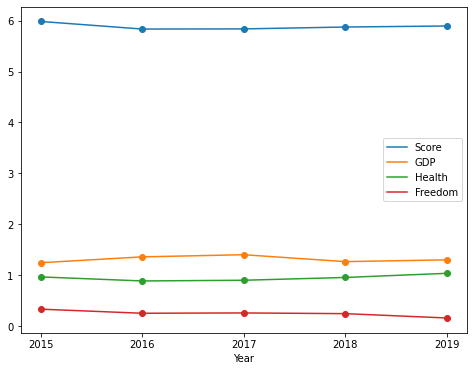

In [45]:
import matplotlib.pyplot as plt

years = df_sk.index
cols = df_sk.columns

plt.figure(figsize=(8, 6))
for col in cols:
    value = df_sk[col].values.flatten().tolist()
    plt.scatter(years, value)
    plt.plot(years, value, label=col)
plt.xlabel("Year")
plt.xticks(years)
plt.legend()

plt.show()